In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import autorootcwd
from tqdm import tqdm

import torch
import pandas as pd
import matplotlib.pyplot as plt 

from src.utils import chord_to_id_map, id_to_chord_map
from src.data.dataset import FullChordDataset
from src.utils import get_filenames, get_chord_annotation, id_to_chord

In [3]:
dataset = FullChordDataset(cached=True)

all_labels = []

for i in tqdm(range(len(dataset))):
    labels = dataset[i][1]
    all_labels.extend(labels)

all_labels_chords = [id_to_chord_map[label.item()] for label in all_labels]

100%|██████████| 1213/1213 [00:20<00:00, 59.12it/s] 


In [8]:
# Convert to pandas series
import pandas as pd
all_labels_series = pd.Series(all_labels_chords)

In [9]:
# Get value counts
all_labels_series.value_counts()

N         341467
G:maj     256350
D:maj     238629
C:maj     238277
A:maj     218984
E:maj     188331
F:maj     160475
A#:maj    120868
G#:maj    102367
A:min      99248
D#:maj     99120
B:maj      93849
C#:maj     84530
E:min      82998
D:min      79437
F#:maj     73313
B:min      66094
G:min      51273
F#:min     44865
C:min      43247
C#:min     41725
F:min      40014
D#:min     31502
G#:min     25734
A#:min     24065
Name: count, dtype: int64

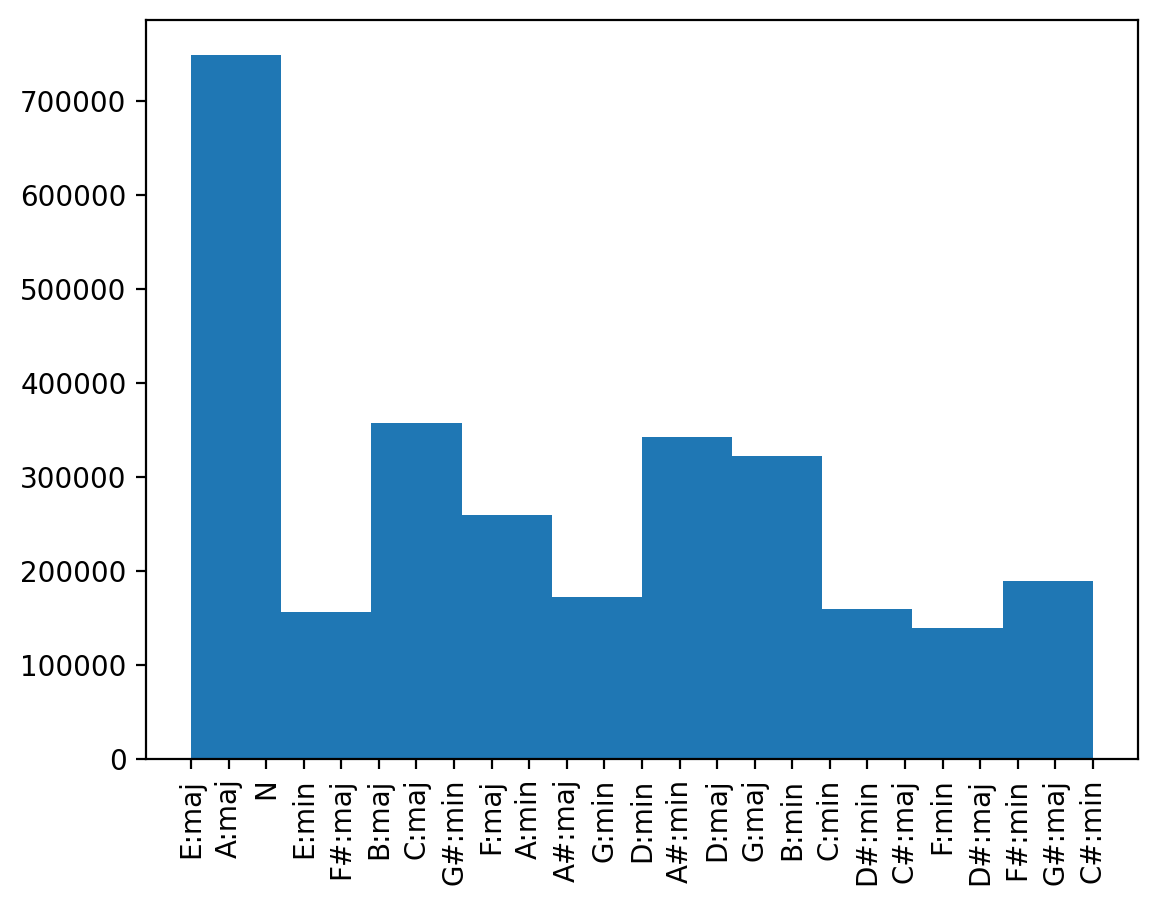

In [6]:
# Print label histogram
plt.hist(all_labels_chords)
plt.xticks(rotation=90)
plt.show()

In [21]:


chord_counts = {}
chord_durations = {}

filenames = get_filenames()
for filename in tqdm(filenames):
    chords = get_chord_annotation(filename)
    for chord in chords:
        chord_id = id_to_chord(chord.value)
        chord_counts[chord_id] = chord_counts.get(chord_id, 0) + 1
        chord_durations[chord_id] = chord_durations.get(chord_id, 0) + chord.duration

chord_counts = pd.Series(chord_counts)

  0%|          | 0/1213 [00:00<?, ?it/s]


KeyError: 'E:min/b3'

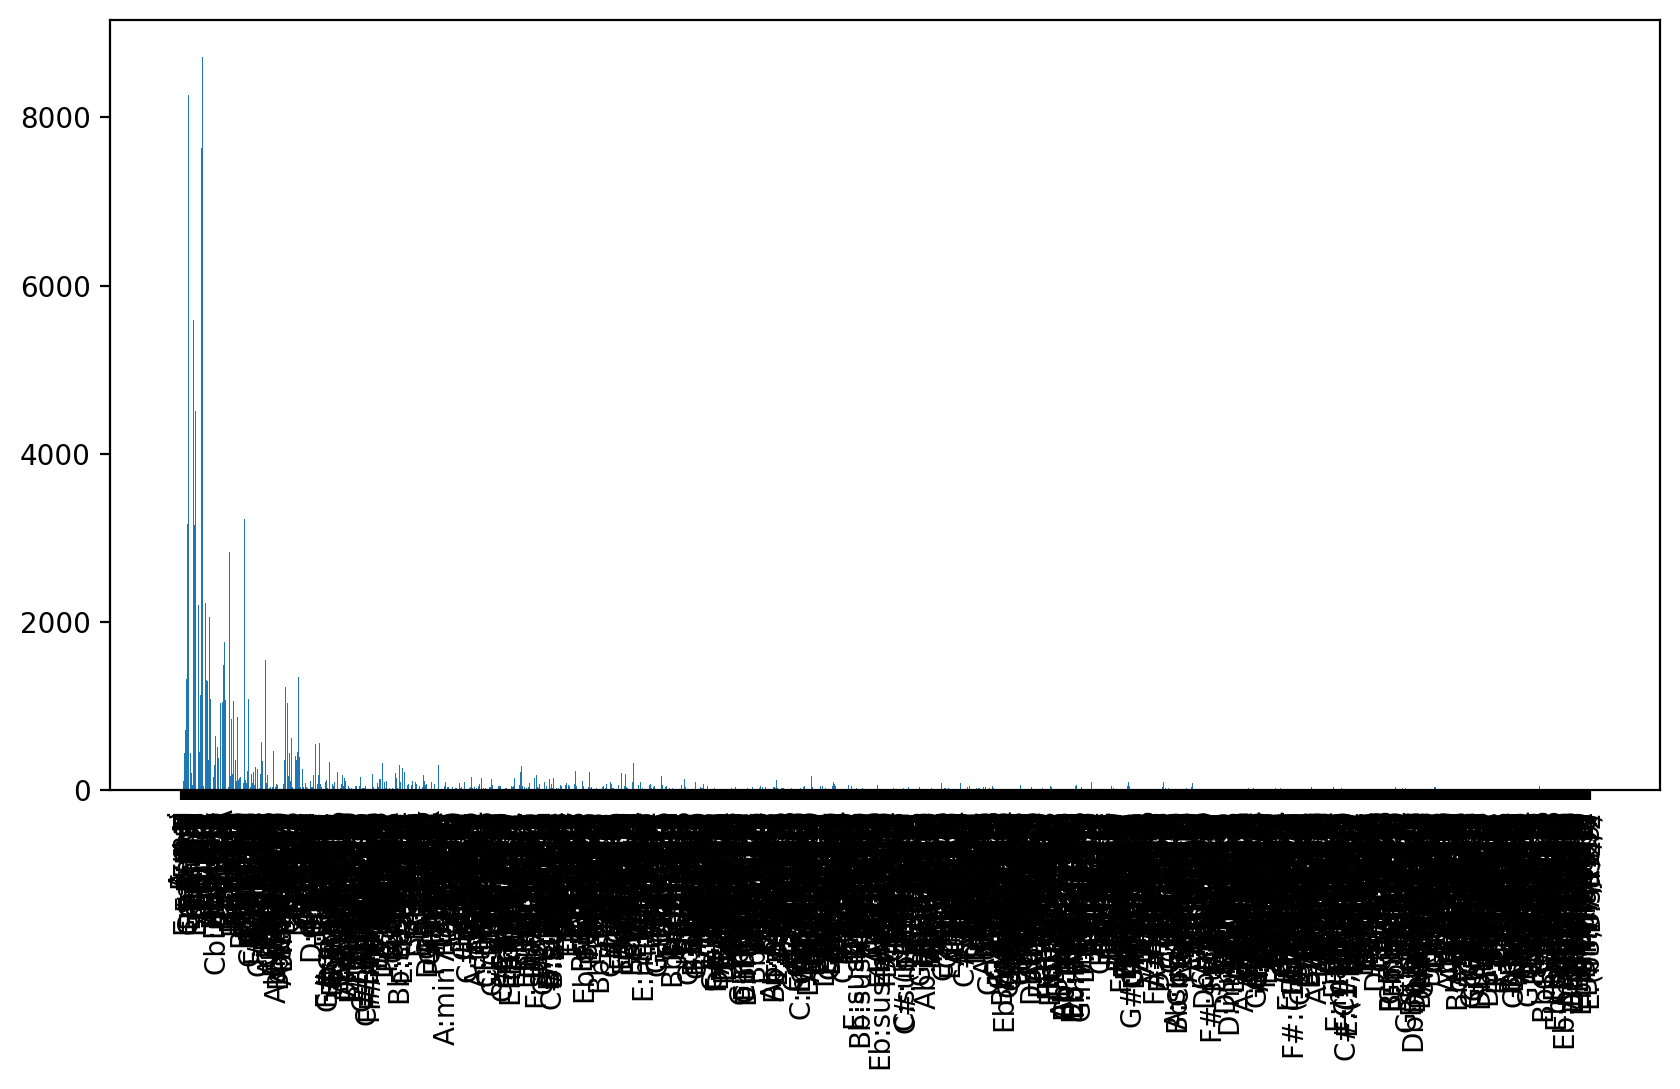

In [20]:
# Plot chord counts
plt.figure(figsize=(10, 5))
plt.bar(chord_counts.keys(), chord_counts.values())
plt.xticks(rotation=90)
plt.show()